<img src="../../../images/banners/pandas-cropped.jpeg" width="600"/>

<a class="anchor" id="essential_basic_functionality"></a>
# <img src="../../../images/logos/pandas.png" width="23"/> Mini Project: Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Load Data

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Check Data Types

In [3]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [4]:
# Check number of unique values for object datatypes for boolean or categorical conversion
{col: df[col].nunique() for col in df if df[col].dtype == object}

{'sex': 2, 'embarked': 3, 'who': 3, 'embark_town': 3, 'alive': 2}

In [5]:
df = df.astype(
    {
        'alive': 'category',
        'sex': 'category',
        'embarked': 'category',
        'who': 'category',
        'embark_town': 'category',
    }
)

In [6]:
df.alive = df.alive.cat.codes
df.sex = df.sex.cat.codes

In [7]:
df.dtypes

survived          int64
pclass            int64
sex                int8
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male         bool
deck           category
embark_town    category
alive              int8
alone              bool
dtype: object

# Check Correlations

In [8]:
df.corr()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


`df.corr()` is not very visible, let's apply some highlights:

In [9]:
df.corr().style.background_gradient(cmap='Greens')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


In [10]:
df.corr()[['survived']].style.background_gradient(cmap='Greens')

,survived
survived,1.000000
pclass,-0.338481
sex,-0.543351
age,-0.077221
sibsp,-0.035322
parch,0.081629
fare,0.257307
adult_male,-0.557080
alive,1.000000
alone,-0.203367


You can also apply custom highlights:

In [11]:
def highlight_cells(val, thresholds, abs_value=True):
    red_thresh, yellow_thresh, green_thresh = thresholds
    if abs_value:
        val = abs(val)
    
    if val > green_thresh:
        color = 'palegreen'
    elif val > yellow_thresh:
        color = 'yellow'
    else:
        color = ''
    
    return 'background-color: {}'.format(color)

In [26]:
df.corr()[['survived']].style.applymap(highlight_cells, thresholds=[0, 0.2, 0.5])

,survived
survived,1.000000
pclass,-0.338481
sex,-0.543351
age,-0.077221
sibsp,-0.035322
parch,0.081629
fare,0.257307
adult_male,-0.557080
alone,-0.203367


In [27]:
df.corr().style.applymap(highlight_cells, thresholds=[0, 0.2, 0.5], subset=['survived'])

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


Or apply highlights by min or max:

In [13]:
abs(df.corr()).style.highlight_min(axis=0)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,0.338481,0.543351,0.077221,0.035322,0.081629,0.257307,0.557080,1.000000,0.203367
pclass,0.338481,1.000000,0.131900,0.369226,0.083081,0.018443,0.549500,0.094035,0.338481,0.135207
sex,0.543351,0.131900,1.000000,0.093254,0.114631,0.245489,0.182333,0.908578,0.543351,0.303646
age,0.077221,0.369226,0.093254,1.000000,0.308247,0.189119,0.096067,0.280328,0.077221,0.198270
sibsp,0.035322,0.083081,0.114631,0.308247,1.000000,0.414838,0.159651,0.253586,0.035322,0.584471
parch,0.081629,0.018443,0.245489,0.189119,0.414838,1.000000,0.216225,0.349943,0.081629,0.583398
fare,0.257307,0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.182024,0.257307,0.271832
adult_male,0.557080,0.094035,0.908578,0.280328,0.253586,0.349943,0.182024,1.000000,0.557080,0.404744
alive,1.000000,0.338481,0.543351,0.077221,0.035322,0.081629,0.257307,0.557080,1.000000,0.203367
alone,0.203367,0.135207,0.303646,0.198270,0.584471,0.583398,0.271832,0.404744,0.203367,1.000000


Survive and alive are represent the same information with 100% correlation, so we can should drop one of them. Let's drop `'alive'`:

In [14]:
df.drop(columns='alive', inplace=True)

## Describe

In [15]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df.describe(include=['category'])

,embarked,class,who,deck,embark_town
count,889,891,891,203,889
unique,3,3,3,7,3
top,S,Third,man,C,Southampton
freq,644,491,537,59,644


## Missing Values Check

In [17]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

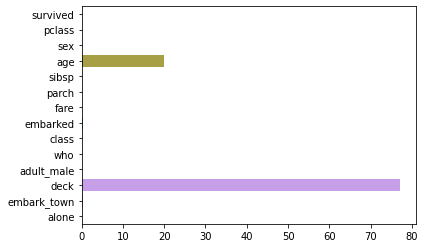

In [18]:
# Some visualization helps

%matplotlib inline
ax = sns.barplot(
    x=df.isna().sum() / df.shape[0] * 100,
    y=df.columns
)

### Deck

Number of missing values is too high! 80%! Better to drop.

In [ ]:
df.drop(columns='deck', inplace=True)

### Age

In [20]:
df.corr()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [23]:
df.corr()[['age']].style.background_gradient('Greens')

,age
survived,-0.077221
pclass,-0.369226
sex,0.093254
age,1.000000
sibsp,-0.308247
parch,-0.189119
fare,0.096067
adult_male,0.280328
alone,0.198270


In [32]:
df.groupby(['adult_male', 'sex']).age.mean()

adult_male  sex
False       0      27.915709
            1       5.466750
True        1      33.173123
Name: age, dtype: float64

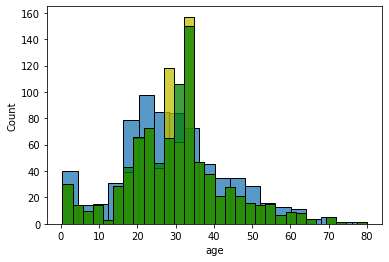

In [55]:
df['age_1'] = df['age'].fillna(df.groupby(['adult_male', 'sex'])['age'].transform('mean'))
df['age_2'] = df['age'].fillna(df.groupby(['adult_male', 'sex', 'sibsp', 'alone'])['age'].transform('mean'))
ax = sns.histplot(df.age)
ax = sns.histplot(df.age_1, ax=ax, color='y', label='age_1')
ax = sns.histplot(df.age_2, ax=ax, color='g', label='age_2')